#Connecticut Department of Mental Health and Addiction Services: An Analytic Report and Research Proposal

##Introduction
This report provides information about the reported accidental drug-related deaths that took place in Connecticut between 2012 and 2017. 

After organizing and analyzing the data, I asked and answered three questions - the answers to which can help to determine the future scope of work for the Connecticut Department of Mental Health and Addiction Services (DMHAS). 

In [248]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

In [249]:
df = pd.read_csv("Accidental_Drug_Related_Deaths__2012-2017.csv")

In [250]:
df.head(n=5)

,CaseNumber,Date,Sex,Race,Age,Residence City,Residence State,Residence County,Death City,Death State,...,Benzodiazepine,Methadone,Amphet,Tramad,Morphine (not heroin),Other,Any Opioid,MannerofDeath,AmendedMannerofDeath,DeathLoc
0,14-9876,06/28/2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Y,NaN,NaN,NaN,NaN,NaN,NaN,Accident,NaN,"CT\n(41.544654, -72.651713)"
1,12-16897,11/30/2012,Male,White,45.0,NaN,NaN,NaN,NEW HAVEN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Accident,NaN,"NEW HAVEN, CT\n(41.308252, -72.924161)"
2,13-11849,08/12/2013,Male,White,30.0,NEW HAVEN,NaN,NaN,NEW HAVEN,NaN,...,NaN,Y,NaN,NaN,NaN,NaN,NaN,Accident,NaN,"NEW HAVEN, CT\n(41.308252, -72.924161)"
3,14-17578,11/23/2014,Male,White,27.0,NAUGATUCK,NaN,NaN,NEW MILFORD,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Accident,NaN,"NEW MILFORD, CT\n(41.576633, -73.408713)"
4,12-11497,08/14/2012,Male,White,21.0,ENFIELD,NaN,NaN,ENFIELD,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Accident,NaN,"ENFIELD, CT\n(41.976501, -72.591985)"


In [251]:
df.describe()  #only the "Age" column is described here because it's the only column with numerical data

,Age
count,4080.000000
mean,41.755882
std,12.319208
min,14.000000
25%,31.000000
50%,42.000000
75%,52.000000
max,87.000000


In [252]:
df["Age"].mode()

0    29.0
dtype: float64

In [253]:
agedf = df["Age"].value_counts().reset_index()  #creating a count of the number of deaths that occurred at each age

In [254]:
agedf.head()

,index,Age
0,29.0,121
1,44.0,119
2,33.0,119
3,50.0,119
4,49.0,119


##Background and Purpose

The data for this report was taken from the Health and Human Services section of Connecticut Open Data on August 14, 2018. The dataset included the demographic (sex, race, state of residence) information of the over 4,000 people who died from an accidental drug-related death in Connecticut over the course of six years. In addition to this demographic information, the dataset included twelve different types of drugs and whether or not each drug contributed to an individual's death. 

The purpose of this report is to pull out trends that can ultimately help the Connecticut DMHAS make decisions about the timing and types of services that they provide to Connecticut residents in order to reduce the number of people who lose their lives to drugs. 

A few quick facts about the people included in this dataset:
+ Sex:
    - Males made up 74% of the dataset
+ Race:
    - White people made up 80.3% of those who died from accidental drug-related deaths.
    - Hispanic people made up 10.7% of the dataset, and 8.1% of the people represented in the dataset are Black.
+ Age:
    - The average age was 42 - the youngest person died at 14 years of age and the oldest person died at 87.
    - The age at which the most deaths occurred was 29.

<Figure size 720x360 with 0 Axes>

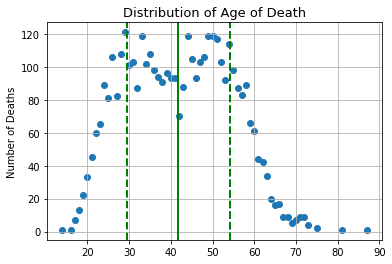

<Figure size 720x360 with 0 Axes>

In [255]:
#plotting a scatter plot of the number of deaths that happen at each age

plt.scatter(x=agedf['index'], y=agedf['Age'])
plt.ylabel("Number of Deaths")
plt.title("Distribution of Age of Death", fontsize=13)
plt.axvline(df["Age"].mean(), color="green", linewidth=2) #drawing a vertical line at the mean of the data
plt.axvline(df["Age"].mean() + df["Age"].std(), color="green", linestyle="dashed", linewidth=2) #drawing a vertical line at one standard deviation
plt.axvline(df["Age"].mean() + df["Age"].std(), color="green", linestyle="dashed", linewidth=2)
plt.axvline(df["Age"].mean() - df["Age"].std(), color="green", linestyle="dashed", linewidth=2)
plt.grid()
plt.figure(figsize = (10,5))

In [297]:
df["Race"].value_counts()

White                     3244
Hispanic, White            432
Black                      329
Hispanic, Black             17
Unknown                     16
Asian, Other                14
Asian Indian                 9
Other                        7
Chinese                      2
Native American, Other       1
Hawaiian                     1
Name: Race, dtype: int64

In [298]:
df["Sex"].value_counts()

Male      2993
Female    1086
Name: Sex, dtype: int64

##Analysis

The topic of accidental drug-related deaths raises many questions. I chose to focus on three of them in this report:
1. Which drug contributed to the highest percentage of deaths?
2. Is there a correlation between the city of death and the type of drug involved in the death?
3. How does the number of drug-related deaths change with the time of year? 

In [299]:
df["Heroin"].value_counts()  #if someone's death was heroin-related, it's marked with a "Y" under the "Heroin" column

Y    2127
y      22
        5
Name: Heroin, dtype: int64

In [300]:
df.groupby("Sex").describe()

Age                                                       Month  \
         count       mean        std   min   25%   50%   75%   max   count   
Sex                                                                          
Female  1086.0  42.537753  12.535221  14.0  32.0  44.0  52.0  81.0  1086.0   
Male    2992.0  41.468917  12.231539  16.0  31.0  41.0  51.0  87.0  2992.0   

                                                       
            mean       std  min  25%  50%   75%   max  
Sex                                                    
Female  6.711786  3.499413  1.0  4.0  7.0  10.0  12.0  
Male    6.666444  3.477064  1.0  4.0  7.0  10.0  12.0

In [301]:
df.columns[15:27] #these select columns are the 12 drugs explicitly named in the dataset

Index(['Heroin', 'Cocaine', 'Fentanyl', 'Oxycodone', 'Oxymorphone', 'EtOH',
       'Hydrocodone', 'Benzodiazepine', 'Methadone', 'Amphet', 'Tramad',
       'Morphine (not heroin)'],
      dtype='object')

In [302]:
drugs = df.iloc[:, 15:27]

In [303]:
drugs.head()

,Heroin,Cocaine,Fentanyl,Oxycodone,Oxymorphone,EtOH,Hydrocodone,Benzodiazepine,Methadone,Amphet,Tramad,Morphine (not heroin)
0,NaN,NaN,Y,NaN,NaN,NaN,Y,Y,NaN,NaN,NaN,NaN
1,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN
3,NaN,NaN,NaN,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [304]:
drug_counts = {}    #creating a dictionary of drug types and the number of deaths the drug caused

for drug in drugs:
    drug_counts[drug] = drugs[drug].value_counts().sum()
      
print(drug_counts)

{'Heroin': 2154, 'Cocaine': 1176, 'Fentanyl': 1467, 'Oxycodone': 547, 'Oxymorphone': 97, 'EtOH': 1005, 'Hydrocodone': 106, 'Benzodiazepine': 1078, 'Methadone': 388, 'Amphet': 103, 'Tramad': 90, 'Morphine (not heroin)': 56}


In [305]:
Other_Count = []  #creating a list of the drugs that represent less than 110 of the deaths to assign them to the category of "Other"

for value in drug_counts.values():
    if value < 110:
        Other_Count.append(value)

drug_counts["Other"] = sum(Other_Count)

print(sum(Other_Count))
print(drug_counts)


452
{'Heroin': 2154, 'Cocaine': 1176, 'Fentanyl': 1467, 'Oxycodone': 547, 'Oxymorphone': 97, 'EtOH': 1005, 'Hydrocodone': 106, 'Benzodiazepine': 1078, 'Methadone': 388, 'Amphet': 103, 'Tramad': 90, 'Morphine (not heroin)': 56, 'Other': 452}


In [306]:
drug_counts

{'Heroin': 2154,
 'Cocaine': 1176,
 'Fentanyl': 1467,
 'Oxycodone': 547,
 'Oxymorphone': 97,
 'EtOH': 1005,
 'Hydrocodone': 106,
 'Benzodiazepine': 1078,
 'Methadone': 388,
 'Amphet': 103,
 'Tramad': 90,
 'Morphine (not heroin)': 56,
 'Other': 452}

In [307]:
#drug_counts_G110 = {}  

#for k,v in drug_counts.items():
 #   if v >= 110 :
  #      drug_counts_G110[k] = drug_counts[k]

In [308]:
#creating a dictionary of drugs that contributed to more than 110 deaths, including the "Other" category
#a key-value pair is created if the value (number of deaths) is greater than 110
drug_counts_G110 = {k:v for k,v in drug_counts.items() if v > 110}

In [309]:
drug_counts_G110

{'Heroin': 2154,
 'Cocaine': 1176,
 'Fentanyl': 1467,
 'Oxycodone': 547,
 'EtOH': 1005,
 'Benzodiazepine': 1078,
 'Methadone': 388,
 'Other': 452}

In [310]:
#creating a dataframe from the dictionary just created of drugs that cause more than 110 deaths
dcdf = pd.DataFrame.from_dict(drug_counts_G110,orient='index').reset_index() 
dcdf.columns = ['Drugs','Counts'] #renaming the columns
dcdf

,Drugs,Counts
0,Heroin,2154
1,Cocaine,1176
2,Fentanyl,1467
3,Oxycodone,547
4,EtOH,1005
5,Benzodiazepine,1078
6,Methadone,388
7,Other,452


In [312]:
dcdf['Fraction'] = dcdf['Counts']/dcdf['Counts'].sum()  
#creating a third column where the number of deaths of a certain drug is divided by the total deaths 
#so that this can be represented in a pie chart

In [313]:
dcdf

,Drugs,Counts,Fraction
0,Heroin,2154,0.260554
1,Cocaine,1176,0.142252
2,Fentanyl,1467,0.177453
3,Oxycodone,547,0.066167
4,EtOH,1005,0.121568
5,Benzodiazepine,1078,0.130398
6,Methadone,388,0.046934
7,Other,452,0.054675


In [272]:
sdcdf = dcdf.sort_values(by=["Fraction"]).reset_index(drop=True)
sdcdf

#creating a list sorted by number of deaths in order to make the pie chart pieces appear in order of size

,Drugs,Counts,Fraction
0,Methadone,388,0.046934
1,Other,452,0.054675
2,Oxycodone,547,0.066167
3,EtOH,1005,0.121568
4,Benzodiazepine,1078,0.130398
5,Cocaine,1176,0.142252
6,Fentanyl,1467,0.177453
7,Heroin,2154,0.260554


###Drug That Contributed to the Highest Percentage of Deaths

In this dataset, twelve different drugs are mentioned by name: amphetamine, benzodiazepine, cocaine, ethanol (EtOH), fentanyl, heroin, hydrocodone, methadone, morphine, oxycodone, oxymorphone, and tramadol. 

####Findings

As represented in the pie chart below, morphine contributed to over a quarter of the accidental drug-related deaths during this time. 

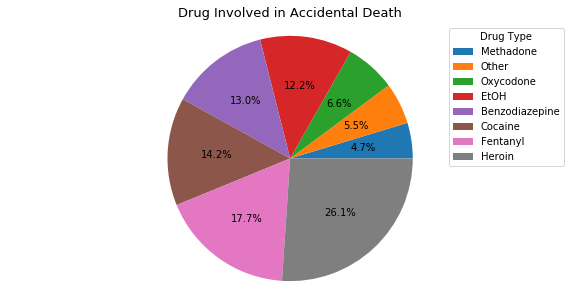

In [314]:
plt.figure(figsize=(10, 5))
plt.pie(sdcdf["Fraction"], autopct="%1.1f%%")  #autopct makes the percentage appear on the pie piece
plt.axis("equal")
plt.title("Drug Involved in Accidental Death", fontsize = 13)
plt.legend(sdcdf["Drugs"], title = "Drug Type")
plt.show()


The top six most lethal drugs according to this dataset are heroin (26.1%), fentanyl (17.9%), cocaine (14.4%), benzodiazepine (13.1%), ethanol (12.0%), and oxycodone (6.6%). Over half of the accidental drug-related deaths between 2012-2017 were caused by either heroin, fentanyl, or cocaine.

####Recommendations
Given this information, the Connecticut DMHAS can direct resources toward the prevention and treatment of those three leading drugs.

In [274]:
list_top4Cities = df["Death City"].value_counts().reset_index().iloc[0:4,0].values 
#identifying the four cities with the most deaths

In [275]:
list_top4Cities.tolist() #creating a list of the top four cities

list_top4Cities.tolist()[0]

'HARTFORD'

In [276]:
list_top6Drugs = sdcdf.iloc[-6:,0] #selecting the six most lethal drugs
list_top6Drugs


2         Oxycodone
3              EtOH
4    Benzodiazepine
5           Cocaine
6          Fentanyl
7            Heroin
Name: Drugs, dtype: object

In [280]:
count_city0 = {} #creating a dictionary for the top four cities with the most deaths
count_city1 = {}
count_city2 = {}
count_city3 = {}

#running a for loop for all six most lethal drugs in each of the top four cities
#within the for loop, a "resident" is defined and a "death" is defined
#then the number of residents who died by a certain type of drug is stored in that city's dictionary
for drug in list_top6Drugs.tolist():
    city0_resident = df_top4Cities["Death City"] == list_top4Cities.tolist()[0]
    death = df[drug] == "Y"
    count_city0[drug] = len(df_top4Cities[city0_resident & death])

    
for drug in list_top6Drugs.tolist():
    city1_resident = df_top4Cities["Death City"] == list_top4Cities.tolist()[1]
    death = df[drug] == "Y"
    count_city1[drug] = len(df_top4Cities[city1_resident & death])

for drug in list_top6Drugs.tolist():
    city2_resident = df_top4Cities["Death City"] == list_top4Cities.tolist()[2]
    death = df[drug] == "Y"
    count_city2[drug] = len(df_top4Cities[city2_resident & death])

    
for drug in list_top6Drugs.tolist():
    city3_resident = df_top4Cities["Death City"] == list_top4Cities.tolist()[3]
    death = df[drug] == "Y"
    count_city3[drug] = len(df_top4Cities[city3_resident & death])
        
print(count_city0)
print(count_city1)
print(count_city2)
print(count_city3)

{'Oxycodone': 28, 'EtOH': 93, 'Benzodiazepine': 61, 'Cocaine': 157, 'Fentanyl': 178, 'Heroin': 241}
{'Oxycodone': 32, 'EtOH': 70, 'Benzodiazepine': 84, 'Cocaine': 97, 'Fentanyl': 87, 'Heroin': 147}
{'Oxycodone': 27, 'EtOH': 66, 'Benzodiazepine': 69, 'Cocaine': 103, 'Fentanyl': 86, 'Heroin': 154}
{'Oxycodone': 25, 'EtOH': 81, 'Benzodiazepine': 70, 'Cocaine': 101, 'Fentanyl': 115, 'Heroin': 139}


C:\Users\jesst\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\Users\jesst\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
C:\Users\jesst\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\jesst\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [281]:
#creating a dataframe with the data pulled out of the four dictionaries just created (drug counts within the top four cities) 

df_topCitiesDrugs = pd.DataFrame()
df_topCitiesDrugs[list_top6Drugs.tolist()[0]] = [count_city0[list_top6Drugs.tolist()[0]], count_city1[list_top6Drugs.tolist()[0]],
                                                count_city2[list_top6Drugs.tolist()[0]], count_city3[list_top6Drugs.tolist()[0]]]
df_topCitiesDrugs[list_top6Drugs.tolist()[1]] = [count_city0[list_top6Drugs.tolist()[1]], count_city1[list_top6Drugs.tolist()[1]],
                                                count_city2[list_top6Drugs.tolist()[1]], count_city3[list_top6Drugs.tolist()[1]]]
df_topCitiesDrugs[list_top6Drugs.tolist()[2]] = [count_city0[list_top6Drugs.tolist()[2]], count_city1[list_top6Drugs.tolist()[2]],
                                                count_city2[list_top6Drugs.tolist()[2]], count_city3[list_top6Drugs.tolist()[2]]]
df_topCitiesDrugs[list_top6Drugs.tolist()[3]] = [count_city0[list_top6Drugs.tolist()[3]], count_city1[list_top6Drugs.tolist()[3]],
                                                count_city2[list_top6Drugs.tolist()[3]], count_city3[list_top6Drugs.tolist()[3]]]
df_topCitiesDrugs[list_top6Drugs.tolist()[4]] = [count_city0[list_top6Drugs.tolist()[4]], count_city1[list_top6Drugs.tolist()[4]],
                                                count_city2[list_top6Drugs.tolist()[4]], count_city3[list_top6Drugs.tolist()[4]]]
df_topCitiesDrugs[list_top6Drugs.tolist()[5]] = [count_city0[list_top6Drugs.tolist()[5]], count_city1[list_top6Drugs.tolist()[5]],
                                                count_city2[list_top6Drugs.tolist()[5]], count_city3[list_top6Drugs.tolist()[5]]]

df_topCitiesDrugs.index = df_topCitiesDrugs["Cities"] = list_top4Cities.tolist()
df_topCitiesDrugs

,Oxycodone,EtOH,Benzodiazepine,Cocaine,Fentanyl,Heroin,Cities
HARTFORD,28,93,61,157,178,241,HARTFORD
NEW HAVEN,32,70,84,97,87,147,NEW HAVEN
WATERBURY,27,66,69,103,86,154,WATERBURY
BRIDGEPORT,25,81,70,101,115,139,BRIDGEPORT


###Type of Drug Involved By City

Given the conclusions from the first question, I dug further into the breakdown of drug type by geographic region.

####Findings

When looking at the number of deaths by city, there is great deal of variance in the datapoints. The average number of deaths per city was 19. Instead of focusing on every city in the dataset, I concentrated on the four cities with the highest number of reported deaths: Hartford, New Haven, Waterbury, and Bridgeport. I labeled these cities the "Big Four Cities."


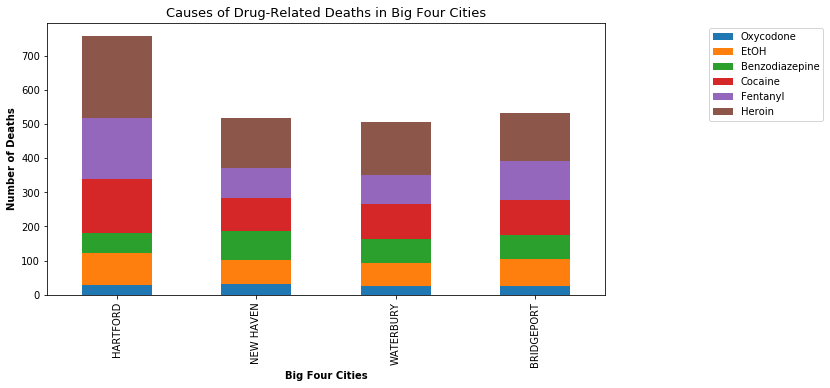

In [315]:
#creating a stacked bar graph of the above dataframe

df_topCitiesDrugs.plot(kind="bar", stacked=True, figsize= (10, 5))
plt.xlabel("Big Four Cities", weight = "bold")
plt.ylabel("Number of Deaths", weight = "bold")
plt.title("Causes of Drug-Related Deaths in Big Four Cities", fontsize = 13)
plt.legend(loc = "upper right", bbox_to_anchor=(.9, 0, .5, 1))

As seen in the bar for Hartford, nearly one-third of the drug-related deaths were caused by heroin - this is a higher percentage than in the other three cities represented. Another anomaly that can be seen in the above figure is that fentanyl makes up an uncharacteristic number of the deaths in Bridgeport as compared to fentanyl-caused deaths in the other three cities. 

####Recommendations
Since Connecticut DMHAS provides services according to five different geographic regions, it is important to recognize where the Big Four Cities fall with regard to region. As it's currently set up, each region has exactly *one* of the Big Four Cities in its vicinity with the exception of Region 3 (which has none). Because the Big Four Cities are spread out across the regions, this setup allows for sufficient allocation of resources. Since Region 3 does not house any of the Big Four Cities, DMHAS could consider reducing resources there and increase the resources in the other four regions.


In [283]:
df["Date"].head()

0    06/28/2014
1    11/30/2012
2    08/12/2013
3    11/23/2014
4    08/14/2012
Name: Date, dtype: object

In [284]:
df["Month"] = pd.to_datetime(df["Date"]).dt.month

In [285]:
monthdf = df["Month"].value_counts().reset_index()
monthdf.columns = ['Month_Num','Counts']
monthdf.sort_values(by=['Month_Num'],inplace=True)
monthdf

,Month_Num,Counts
8,1.0,319
7,2.0,325
5,3.0,329
11,4.0,314
6,5.0,326
3,6.0,354
4,7.0,345
9,8.0,318
10,9.0,317
2,10.0,369


In [286]:
monthdf

,Month_Num,Counts
8,1.0,319
7,2.0,325
5,3.0,329
11,4.0,314
6,5.0,326
3,6.0,354
4,7.0,345
9,8.0,318
10,9.0,317
2,10.0,369


In [287]:
monthdf.columns = ['Month_Num',"Deaths"]

monthdf

,Month_Num,Deaths
8,1.0,319
7,2.0,325
5,3.0,329
11,4.0,314
6,5.0,326
3,6.0,354
4,7.0,345
9,8.0,318
10,9.0,317
2,10.0,369


In [288]:
month_names = {1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun", 
               7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"}

In [289]:
monthdf['Month_Name'] = monthdf['Month_Num'].apply(lambda x: month_names[x])

In [290]:
del monthdf['Month_Num']

In [291]:
monthdf

,Deaths,Month_Name
8,319,Jan
7,325,Feb
5,329,Mar
11,314,Apr
6,326,May
3,354,Jun
4,345,Jul
9,318,Aug
10,317,Sep
2,369,Oct


In [292]:
monthdf.mean()

Deaths    340.083333
dtype: float64

In [293]:
monthdf.describe()

,Deaths
count,12.000000
mean,340.083333
std,25.949105
min,314.000000
25%,318.750000
50%,327.500000
75%,357.750000
max,388.000000


In [294]:
monthdf

,Deaths,Month_Name
8,319,Jan
7,325,Feb
5,329,Mar
11,314,Apr
6,326,May
3,354,Jun
4,345,Jul
9,318,Aug
10,317,Sep
2,369,Oct


In [295]:
monthdf.set_index(monthdf['Month_Name'],inplace=True)

###Correlation Between Time of Year and Number of Deaths

Since mental health issues can sometimes rise and fall depending on the season or the weather, I looked into which times of the year had the highest number of deaths and which had the lowest. 

####Findings

After analyzing the data and looking at each person's month of death, Connecticut saw the most accidental drug-related deaths toward the end of the calendar year. 

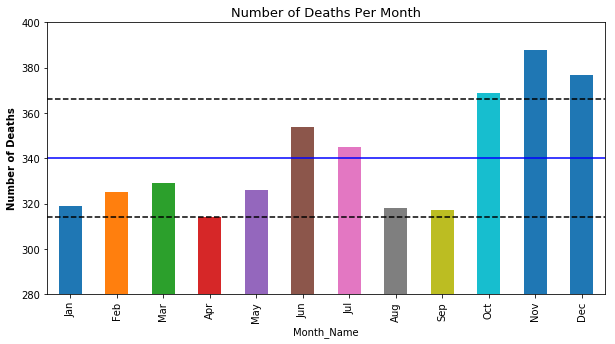

In [296]:
plt.ylabel("Number of Deaths", weight = "bold")
#plt.xlabel("Month of the Year", weight = "bold")
plt.title("Number of Deaths Per Month", fontsize = 13)
plt.axhline(monthdf["Deaths"].mean(), color="blue")
plt.axhline(monthdf["Deaths"].mean() + monthdf["Deaths"].std(), color = "black", linestyle = "dashed")
plt.axhline(monthdf["Deaths"].mean() - monthdf["Deaths"].std(), color = "black", linestyle = "dashed")
plt.ylim(280, 400)
monthdf["Deaths"].plot.bar(figsize = (10, 5))
#plt.xticks=monthdf["Month_Name"]


The average number of deaths per month (as represented by the solid blue line in the above graph) was 340. 

November had the most recorded deaths with 388. This number is nearly two standard deviations above the mean. If one looks at the top quartile of months (October, November, and December), the average number of deaths per month was 378, which is 38 deaths higher than the average of the entire dataset. 

In the bottom quartile of months (April, August, and September), the average number of deaths per month was 316.

####Recommendations

Given that Connecticut DMHAS's funds and resources are finite, the organization can provide more staffing and resources for prevention and treatment during the heavier months while possibly reducing the use of resources during the lighter months. 


##Conclusion and Future Research

The analysis of the data revealed three things: 
+ the most lethal drugs
+ how the most lethal drugs break down by city
+ times of the year that prove most deadly

Further research could be done into whether or not - based on the racial demographic data of Connecticut - there is an overrepresentation of certain races in the dataset. On a more qualitative note, every death in this dataset is categorized as "accidental." That said, it would be interesting to look back at how this data was gathered to determine what makes a drug-related death "accidental" versus "intentional" (suicide). 